<a href="https://colab.research.google.com/github/leandrodmf/Drug_Reg_ANVISA_KMeans/blob/main/Drug_Reg_ANVISA_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Title**: Portfolio analysis
### Author: Leandro França

#### ANVISA DATABASE: Medicines Registered in Brazil
#### Data URL: https://dados.gov.br/dados/conjuntos-dados/medicamentos-registrados-no-brasil

**Description**: This script builds a sequential evaluation of the data, trying to evaluate critically the data outputs.

-The dataset used in this example contains the **following features**:
- PRODUCT_TYPE
- PRODUCT_NAME
- PROCESS_FINALIZATION_DATE
- REGULATORY_CATEGORY
- PRODUCT_REGISTRATION_NUMBER
- REGISTRATION_EXPIRATION_DATE
- PROCESS_NUMBER
- THERAPEUTIC_CLASS
- REGISTRATION_HOLDER_COMPANY
- REGISTRATION_STATUS
- ACTIVE_INGREDIENT

The script loads and preprocesses the data using the StandardScaler class from the scikit-learn library. It then splits the data into training and testing sets using the train_test_split function from scikit-learn.

**Dependencies**:
- pandas;
- matplotlib;
- Seaborn;
- SKLearn.

**ATTENTION**: Run the script in a Python environment, but use responsably. Mistakes can be commited.

**Results**: Check README file on github repository.

# 1. Organizating the Data

In [153]:
import pandas as pd

# Loading the data
df = pd.read_csv('/content/MEDS_OPEN_DATA.csv', sep=',')

In [154]:
# Filtering Valid Registers
df = df[df['REGISTRATION_STATUS'] == 'VÁLIDO']
# df.head()

In [155]:
# Philter by Year - until 2022
df['PROCESS_FINALIZATION_DATE'] = pd.to_datetime(df['PROCESS_FINALIZATION_DATE'],errors='coerce')
df = df[df['PROCESS_FINALIZATION_DATE'].dt.year < 2023]
# df

<ipython-input-155-730eb0391f7a>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['PROCESS_FINALIZATION_DATE'] = pd.to_datetime(df['PROCESS_FINALIZATION_DATE'],errors='coerce')
<ipython-input-155-730eb0391f7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PROCESS_FINALIZATION_DATE'] = pd.to_datetime(df['PROCESS_FINALIZATION_DATE'],errors='coerce')


## 1.1 Organizing the Tables

In [156]:
# Companies with more products registered
df_most_reg = df.groupby('REGISTRATION_HOLDER_COMPANY')['PRODUCT_REGISTRATION_NUMBER'].count()
df_most_reg = df_most_reg.sort_values(ascending=False).head(20)
company = ['EMS',
 'EUROFARMA',
 'ACHÉ',
 'TEUTO',
 'LEGRAND PHARMA',
 'GERMED',
 'SANOFI MEDLEY',
 'BRAINFARMA',
 'CRISTÁLIA',
 'UNIÃO QUÍMICA',
 'GEOLAB',
 'MULTILAB',
 'NOVA QUIMICA',
 'PRATI DONADUZZI',
 'CIMED',
 'COSMED',
 'BIOLAB',
 'SANDOZ',
 'BLAU',
 'EMS SIGMA PHARMA']

df_most_reg = pd.DataFrame({'Company': company, '#Registers': df_most_reg.values})
df_most_reg.set_index('Company', inplace=True)
df_most_reg.loc['Total'] = df_most_reg.sum()

total_registers = df['PRODUCT_REGISTRATION_NUMBER'].count()
top_20_registers = df_most_reg.loc['Total']['#Registers']
percentage_top_20 = (top_20_registers / total_registers) * 100
companies_num = df["REGISTRATION_HOLDER_COMPANY"].nunique()

# print(df_most_reg)
# print(f">> Total number of registers: {total_registers}")
# print(f">> Percentage of registers held by top 20 companies: {percentage_top_20:.2f}% of registers, in a total of {companies_num} Companies.")

In [157]:
# Billionare companies dataframe

companies = ['PFIZER', 'EUROFARMA', 'HYPERA', 'NC', 'ACHÉ', 'NOVARTIS', 'ROCHE', 'UNIÃO QUÍMICA', 'ABBOTT', 'LIBBS',
             'FARMOQUÍMICA', 'MERCK', 'CIMED', 'PRATI DONADUZZI', 'BRISTOL-MYERS SQUIBB', 'BLAU', 'TEUTO', 'APSEN']
values_in_billions = [8.1, 8, 7.5, 6.8, 5, 4, 4,3.8, 2.8, 2.3, 2.1, 2, 1.9, 1.7, 1.6, 1.4, 1.3, 1.1]

df_billion_comp = pd.DataFrame({'Company': companies, 'Value (Billions)': values_in_billions})
df_billion_comp.set_index('Company', inplace=True)

# Adding the number of Registers
df_billion_comp['#Registers'] = 0

for company in df_billion_comp.index:
    count = df[df['REGISTRATION_HOLDER_COMPANY'].str.contains(company)]['PRODUCT_REGISTRATION_NUMBER'].count()
    df_billion_comp.loc[company, '#Registers'] = count

df_billion_comp

,Value (Billions),#Registers
Company,,
PFIZER,8.1,11
EUROFARMA,8.0,468
HYPERA,7.5,13
NC,6.8,196
ACHÉ,5.0,413
NOVARTIS,4.0,126
ROCHE,4.0,32
UNIÃO QUÍMICA,3.8,243
ABBOTT,2.8,56


In [158]:
# Top 20 in unit sales (2022)

tables = pd.read_html('https://www.abradilan.com.br/mercado/das-20-maiores-farmaceuticas-do-brasil-17-sao-nacionais/')

In [159]:
df_top_20_sales = tables[0]  # Access the first table in the list

columns_new = ['Ranking', 'Company', 'Unit Sales (millions)', 'Growth (%)']
df_top_20_sales = df_top_20_sales[1:]  # Take the data less the header row
df_top_20_sales.columns = columns_new  # Set the header row as the df header

df_top_20_sales.loc[:, 'Company'] = df_top_20_sales['Company'].str.upper()

df_top_20_sales = df_top_20_sales[['Company', 'Unit Sales (millions)']]
df_top_20_sales.set_index('Company', inplace=True)

df_top_20_sales['Unit Sales (millions)'] = pd.to_numeric(df_top_20_sales['Unit Sales (millions)'], errors='coerce')
df_top_20_sales['Unit Sales (millions)'] = df_top_20_sales['Unit Sales (millions)'] / 10

df_top_20_sales['Unit Sales (millions)'] = df_top_20_sales.apply(
    lambda row: row['Unit Sales (millions)'] * 10 if row.name in ['ACHÉ', 'SANOFI', 'PRATI-DONADUZZI'] else row['Unit Sales (millions)'],
    axis=1
)

# Add number of Registers
df_top_20_sales['#Registers'] = 0

# Changing some companies names
df_top_20_sales = df_top_20_sales.rename(index={'PRATI-DONADUZZI': 'PRATI DONADUZZI', 'HYPERA CH': 'HYPERA', 'MEDQUÍMICA': 'MEDQUIMICA'})

# NEO QUIMICA and MANTECORP are part of BRAINFARMA, so MANTECORP  were removed and NEO Q use BRAINFARMA #Registers

for company in df_top_20_sales.index:
    count = df[df['REGISTRATION_HOLDER_COMPANY'].str.contains(company)]['PRODUCT_REGISTRATION_NUMBER'].count()
    df_top_20_sales.loc[company, '#Registers'] = count

df_top_20_sales.loc['NEO QUÍMICA', '#Registers'] = 276
df_top_20_sales.drop(df_top_20_sales[df_top_20_sales.index == 'MANTECORP FARMASA'].index, inplace=True)

# Display the dataframe
df_top_20_sales

,Unit Sales (millions),#Registers
Company,,
NEO QUÍMICA,463.6,276
CIMED,389.6,191
EMS,356.2,668
EUROFARMA,238.2,468
ACHÉ,216.0,413
TEUTO,214.3,358
UNIÃO QUÍMICA,186.1,243
MEDLEY,174.7,321
SANOFI,157.0,324


#2 Hypothesis testing

Thesis #1

$H_0 :$ The most valuable companies have more medicines registers.\
$H_1 :$ The medicines registers number have no relationship to company value.\

In [160]:
from scipy.stats import ttest_ind

# Independent T-test
stats, p_valor = ttest_ind (df_billion_comp['Value (Billions)'], df_billion_comp['#Registers'], alternative = "greater")
print('Independent T-test')
print('p-value', p_valor)

Independent T-test
p-value 0.9999661514726548


In [161]:
import scipy.stats as stats

# Pearsons correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df_billion_comp['Value (Billions)'], df_billion_comp['#Registers'])

print(f"Pearson correlation coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")

# Results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("We reject the null hypothesis. There is a correlation between 'company value' and '#Registers'.")
else:
    print("We fail to reject the null hypothesis. There is not enough evidence to conclude that there is a correlation between 'company value' and '#Registers'.")

Pearson correlation coefficient: 0.17204648156173769
p-value: 0.49483014965701033
We fail to reject the null hypothesis. There is not enough evidence to conclude that there is a correlation between 'company value' and '#Registers'.


Thesis #2

$H_0 :$ Companies with the highest sales volume have the most of the medicines registers.\
$H_1 :$ Companies with the highest sales volume do not have the highest number of drug registrations.

In [162]:
from scipy.stats import ttest_ind

# Independent T-test
stats, p_valor = ttest_ind (df_top_20_sales['Unit Sales (millions)'], df_top_20_sales['#Registers'], alternative = "greater")
print('Independent T-test')
print('p-value', p_valor)

Independent T-test
p-value 0.9627782363519197


In [163]:
import scipy.stats as stats

# Pearsons correlation coefficient
correlation_coefficient, p_value = stats.pearsonr(df_top_20_sales['Unit Sales (millions)'], df_top_20_sales['#Registers'])

print(f"Pearsons correlation coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")

# Results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("We reject the null hypothesis. There is a correlation between 'sales' and '#Registers'.")
else:
    print("We fail to reject the null hypothesis. There is not enough evidence to conclude that there is a correlation between 'sales' and '#Registers'.")

Pearsons correlation coefficient: 0.5081781070773128
p-value: 0.02631634505467447
We reject the null hypothesis. There is a correlation between 'sales' and '#Registers'.


## 2.2 Clustering Analysis

In [164]:
# DataFrame for clustering analysis
df_clustering = df[['REGISTRATION_HOLDER_COMPANY', 'REGULATORY_CATEGORY']]
df_clustering = pd.get_dummies(df_clustering, columns=['REGULATORY_CATEGORY'], prefix=['RegCat'])
df_aggregated = df_clustering.groupby('REGISTRATION_HOLDER_COMPANY').sum().reset_index()
df_kmeans = df_aggregated.drop('REGISTRATION_HOLDER_COMPANY', axis=1)

In [165]:
# Preprosessing 1: MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_df_kmeans = scaler.fit_transform(df_kmeans)

### 2.2.1 PCA Metrics

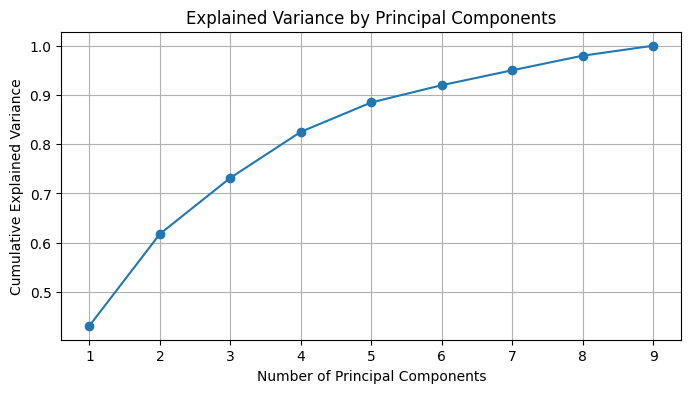

PCA number: 7


In [166]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# PCA
pca = PCA()
pca.fit(scaled_df_kmeans)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

# Choose the number of PCs that explain a sufficient amount of variance
# For example, select the number of PCs that explain at least 95% of the variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

print(f"PCA number: {n_components}")

# Apply PCA with selected number of components
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_df_kmeans)

In [167]:
# PCA Loadings

loadings = pca.components_
loadings_df = pd.DataFrame(loadings, columns=df_kmeans.columns)

most_important_loadings = []
for i in range(loadings_df.shape[0]):
  top_loadings_indices = np.abs(loadings_df.iloc[i]).nlargest(5).index
  most_important_loadings.append({
      'PC': i + 1,
      'Top Loadings': loadings_df.iloc[i][top_loadings_indices].to_dict()
  })

for component in most_important_loadings:
  print(f"PC {component['PC']}:")
  for feature, loading in component['Top Loadings'].items():
    print(f"  - {feature}: {loading:.3f}")

PC 1:
  - RegCat_ESPECÍFICO: 0.656
  - RegCat_SIMILAR: 0.542
  - RegCat_GENÉRICO: 0.397
  - RegCat_NOVO: 0.255
  - RegCat_FITOTERÁPICO: 0.199
PC 2:
  - RegCat_NOVO: 0.804
  - RegCat_BIOLÓGICO: 0.500
  - RegCat_ESPECÍFICO: -0.206
  - RegCat_PRODUTO DE T: 0.151
  - RegCat_SIMILAR: -0.132
PC 3:
  - RegCat_ESPECÍFICO: 0.559
  - RegCat_GENÉRICO: -0.558
  - RegCat_SIMILAR: -0.449
  - RegCat_FITOTERÁPICO: 0.406
  - RegCat_NOVO: 0.085
PC 4:
  - RegCat_FITOTERÁPICO: 0.864
  - RegCat_ESPECÍFICO: -0.446
  - RegCat_BIOLÓGICO: -0.123
  - RegCat_GENÉRICO: 0.116
  - RegCat_SIMILAR: 0.113
PC 5:
  - RegCat_BIOLÓGICO: 0.825
  - RegCat_NOVO: -0.444
  - RegCat_PRODUTO DE T: -0.263
  - RegCat_FITOTERÁPICO: 0.185
  - RegCat_SIMILAR: -0.096
PC 6:
  - RegCat_DINAMIZADO: 0.997
  - RegCat_RADIOFÁRMACO: -0.066
  - RegCat_BIOLÓGICO: 0.026
  - RegCat_ESPECÍFICO: 0.012
  - RegCat_PRODUTO DE T: -0.010
PC 7:
  - RegCat_GENÉRICO: 0.676
  - RegCat_SIMILAR: -0.646
  - RegCat_PRODUTO DE T: 0.316
  - RegCat_ESPECÍFICO: 0.

### 2.2.2 KMeans model metrics

In [168]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def kmeans_evaluation(data, k_num):
  inertia = []
  silhouette = []
  k_ini = k_num
  for k in range(2, k_ini):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init ='auto', max_iter=500)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)
    silhouette.append(f'k={k} - '+ str(silhouette_score(data, kmeans.predict(data))))
  return silhouette, inertia

In [169]:
# Silhouette for Scaled Kmeans
silhouette, inertia = kmeans_evaluation(scaled_df_kmeans, 9)
silhouette

['k=2 - 0.6804597635971341',
 'k=3 - 0.5700781526591203',
 'k=4 - 0.5804877584460122',
 'k=5 - 0.6072279028948506',
 'k=6 - 0.6183735255199478',
 'k=7 - 0.6009577325299058',
 'k=8 - 0.5102529535185564']

In [170]:
# Silhouette for PCA
silhouette, inertia = kmeans_evaluation(pca_data, 9)
silhouette

['k=2 - 0.6891633069620041',
 'k=3 - 0.6179512777800475',
 'k=4 - 0.6364700293903819',
 'k=5 - 0.6383697067494071',
 'k=6 - 0.5734535248883701',
 'k=7 - 0.5762310816012911',
 'k=8 - 0.5300797227931723']

In [171]:
# Silhouette graph and elbow chart Plot

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

def plot_silhouette_and_elbow(data, k_num, inertia_num):
  """Plots the silhouette graph and elbow chart in a subplot arrangement.

  Args:
    data: The data to be used for clustering.
    k_num: The maximum number of clusters to consider.
    inertia_num: The maximum number of iterations for the KMeans algorithm to inertia evaluation.
  """

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

  # Silhouette Graph
  n_clusters = k_num
  kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto', max_iter=500)
  cluster_pred = kmeans.fit_predict(data)

  silhouette_mean = silhouette_score(data, cluster_pred)
  silhouette_samp = silhouette_samples(data, cluster_pred)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(data) + (n_clusters + 1) * 10])

  y_lower = 10
  for i in range(n_clusters):
      ith_cluster_silhouette_sample = silhouette_samp[cluster_pred == i]
      ith_cluster_silhouette_sample.sort()

      tamanho_cluster_i = ith_cluster_silhouette_sample.shape[0]
      y_upper = y_lower + tamanho_cluster_i

      cor = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_sample,
                        facecolor=cor, edgecolor=cor, alpha=0.7)

      ax1.text(-0.05, y_lower + 0.5 * tamanho_cluster_i, str(i))
      y_lower = y_upper + 10

  ax1.axvline(x=silhouette_mean, color='red', linestyle='--')

  ax1.set_title(f'Silhouette plot for {n_clusters} clusters')
  ax1.set_xlabel('Silhouette coefficient values')
  ax1.set_ylabel('Cluster label')

  ax1.set_yticks([])
  ax1.set_xticks([i/10.0 for i in range(-1, 11)])


  # Elbow Chart
  inertia = []
  i_max = inertia_num

  for k in range(2, i_max):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto', max_iter=500)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

  ax2.plot(range(2, 9), inertia, 'bo-')
  ax2.set_xlabel('Clusters number')
  ax2.set_ylabel('Inertia')
  ax2.set_title('Elbow chart')


  plt.tight_layout()
  plt.show()

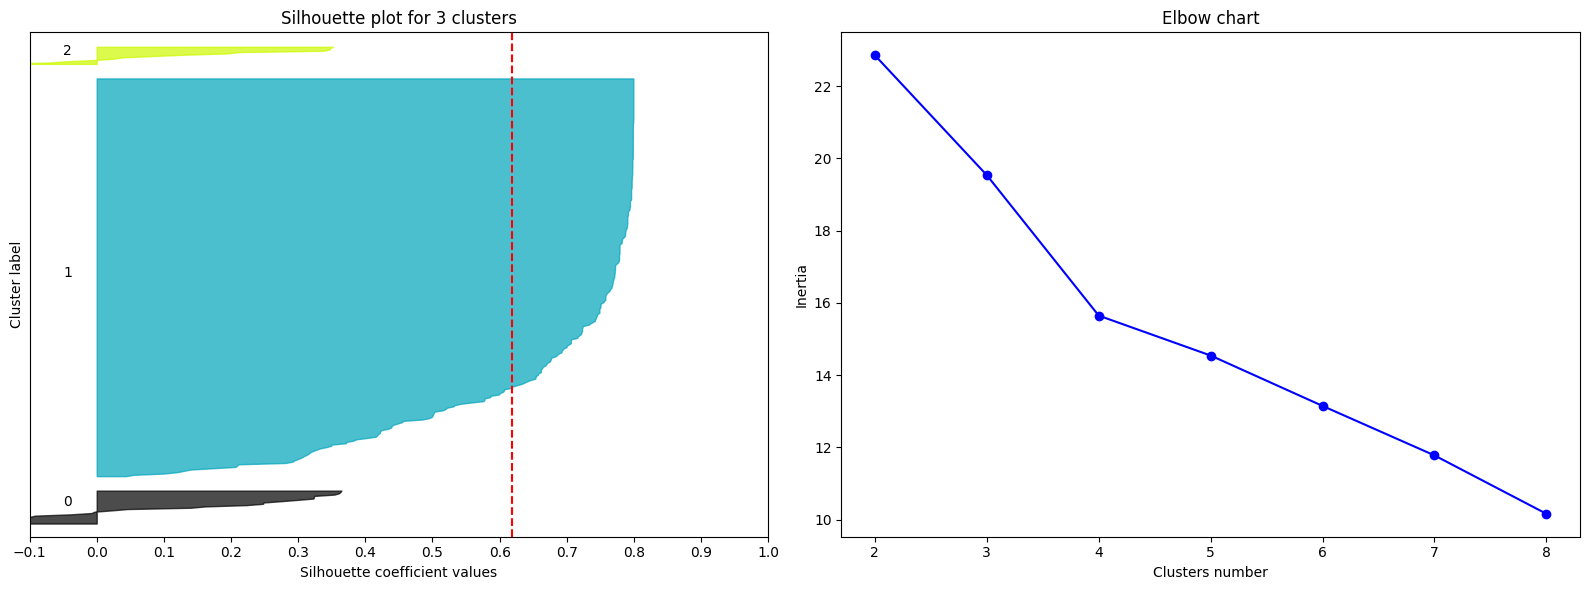

In [172]:
plot_silhouette_and_elbow(pca_data, 3, 9)

### 3.3 Most suitable model

In [173]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

preprocessor = Pipeline([("scaler", MinMaxScaler()),
 ("pca", PCA(n_components=7, random_state=42)),])

clusterer = Pipeline([("kmeans", KMeans(n_clusters=3,
                                        n_init='auto',
                                        max_iter=500,
                                        random_state=42))])

pipe = Pipeline([("preprocessor", preprocessor),("clusterer", clusterer)])

In [174]:
pipe.fit(df_kmeans)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', MinMaxScaler()),
                                 ('pca',
                                  PCA(n_components=7, random_state=42))])),
                ('clusterer',
                 Pipeline(steps=[('kmeans',
                                  KMeans(max_iter=500, n_clusters=3,
                                         random_state=42))]))])

# 4 Evaluating the Clusters

In [175]:
data_analisys = pd.DataFrame()
data_analisys = df_kmeans.copy()
data_analisys['cluster'] = pipe["clusterer"]["kmeans"].labels_
cluster_mean = data_analisys.groupby('cluster').mean()
cluster_mean = cluster_mean.transpose()
cluster_mean.columns = list(range(cluster_mean.shape[1]))
cluster_mean

,0,1,2
RegCat_BIOLÓGICO,0.769231,1.191419,4.357143
RegCat_DINAMIZADO,0.038462,0.237624,0.000000
RegCat_ESPECÍFICO,12.076923,0.643564,11.928571
RegCat_FITOTERÁPICO,3.461538,0.656766,4.142857
RegCat_GENÉRICO,16.730769,3.937294,168.785714
RegCat_NOVO,6.192308,3.108911,14.285714
RegCat_PRODUTO DE T,0.000000,0.009901,0.000000
RegCat_RADIOFÁRMACO,0.038462,0.128713,0.000000
RegCat_SIMILAR,23.846154,4.128713,117.071429


In [176]:
df_aggregated['cluster'] = pipe["clusterer"]["kmeans"].labels_

In [177]:
# Clusters
for cluster_num in cluster_mean.columns:
  print(f"\nDataFrame for Cluster {cluster_num}:")
  cluster_df = pd.DataFrame(cluster_mean[cluster_num].sort_values(ascending=False))
  print(cluster_df)


DataFrame for Cluster 0:
                             0
RegCat_SIMILAR       23.846154
RegCat_GENÉRICO      16.730769
RegCat_ESPECÍFICO    12.076923
RegCat_NOVO           6.192308
RegCat_FITOTERÁPICO   3.461538
RegCat_BIOLÓGICO      0.769231
RegCat_DINAMIZADO     0.038462
RegCat_RADIOFÁRMACO   0.038462
RegCat_PRODUTO DE T   0.000000

DataFrame for Cluster 1:
                            1
RegCat_SIMILAR       4.128713
RegCat_GENÉRICO      3.937294
RegCat_NOVO          3.108911
RegCat_BIOLÓGICO     1.191419
RegCat_FITOTERÁPICO  0.656766
RegCat_ESPECÍFICO    0.643564
RegCat_DINAMIZADO    0.237624
RegCat_RADIOFÁRMACO  0.128713
RegCat_PRODUTO DE T  0.009901

DataFrame for Cluster 2:
                              2
RegCat_GENÉRICO      168.785714
RegCat_SIMILAR       117.071429
RegCat_NOVO           14.285714
RegCat_ESPECÍFICO     11.928571
RegCat_BIOLÓGICO       4.357143
RegCat_FITOTERÁPICO    4.142857
RegCat_DINAMIZADO      0.000000
RegCat_PRODUTO DE T    0.000000
RegCat_RADIOFÁRMACO    0

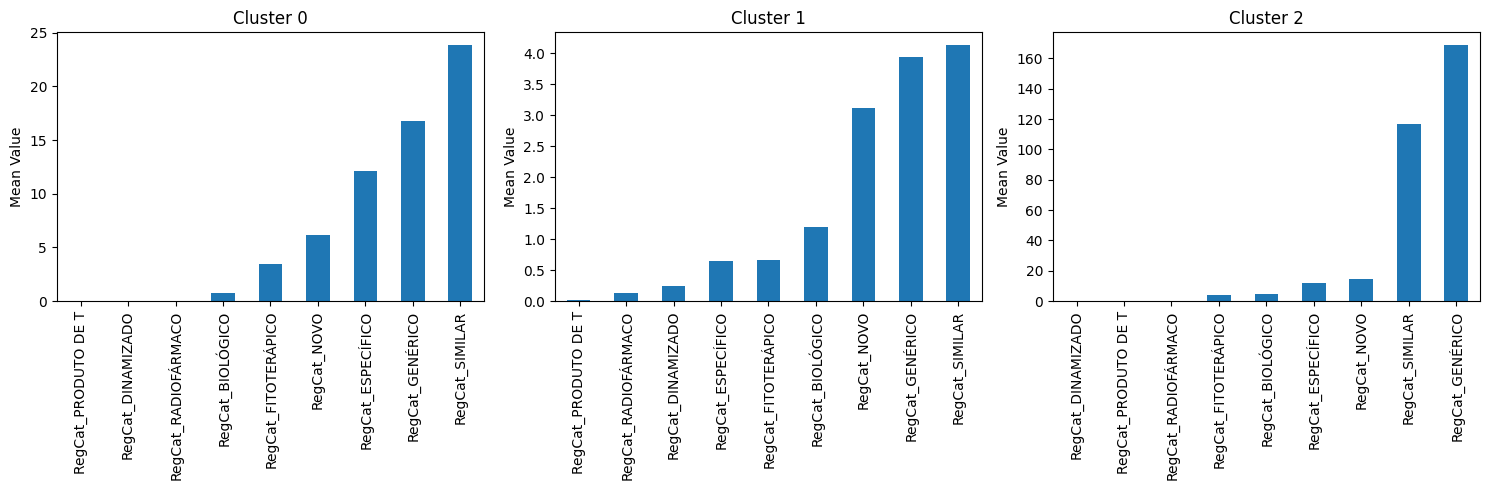

In [178]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, len(cluster_mean.columns), figsize=(15, 5))

for i, col in enumerate(cluster_mean.columns):
  cluster_mean[col].sort_values(ascending=True).plot(kind='bar', ax=axs[i])
  axs[i].set_title(f'Cluster {col}')
  axs[i].set_ylabel('Mean Value')
  axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [179]:
# Value dataframe

df_billion_comp['Cluster'] = 0

for company in df_billion_comp.index:
    mask = df_aggregated['REGISTRATION_HOLDER_COMPANY'].str.contains(company)
    indices = df_aggregated[mask].index

    if len(indices) > 0:
        value = df_aggregated.loc[indices, 'cluster'].iloc[0] # Use .iloc[0] to get the first element if multiple matches are found
        df_billion_comp.loc[company, 'Cluster'] = value

df_billion_comp

,Value (Billions),#Registers,Cluster
Company,,,
PFIZER,8.1,11,1
EUROFARMA,8.0,468,2
HYPERA,7.5,13,1
NC,6.8,196,1
ACHÉ,5.0,413,2
NOVARTIS,4.0,126,1
ROCHE,4.0,32,1
UNIÃO QUÍMICA,3.8,243,2
ABBOTT,2.8,56,1


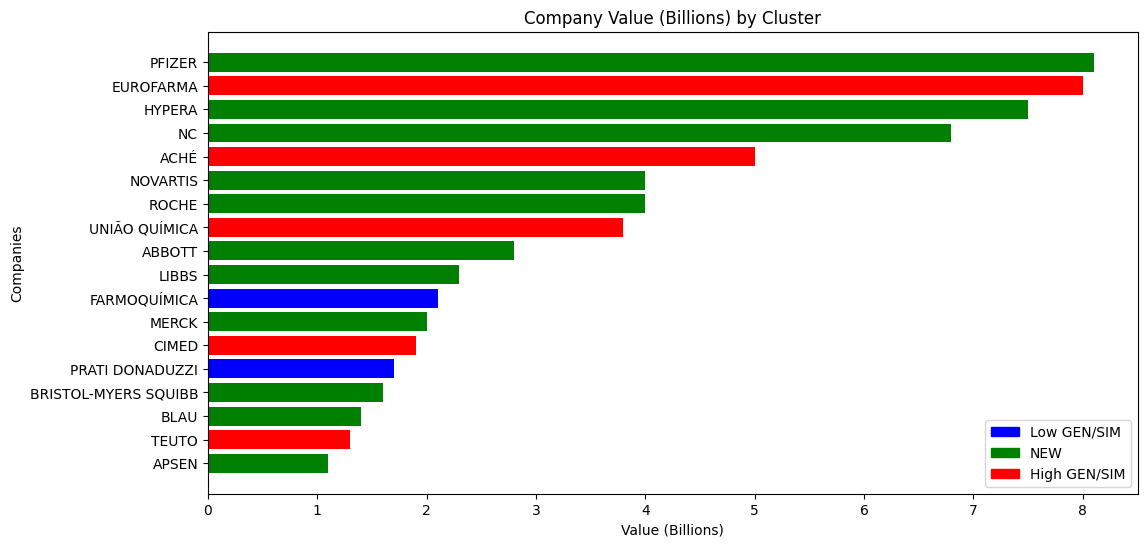

In [185]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))

df_billion_comp_sorted = df_billion_comp.sort_values('Value (Billions)', ascending=True)

color_map = {
    0: ('blue', 'Low GEN/SIM'),
    1: ('green', 'NEW'),
    2: ('red', 'High GEN/SIM')
}


plt.barh(df_billion_comp_sorted.index, df_billion_comp_sorted['Value (Billions)'],
                color=df_billion_comp_sorted['Cluster'].map(lambda x: color_map[x][0]))

plt.xlabel('Value (Billions)')
plt.ylabel('Companies')
plt.title('Company Value (Billions) by Cluster')
# plt.grid(True)

legend_patches = [mpatches.Patch(color=color, label=label) for cluster, (color, label) in color_map.items()]
plt.legend(handles=legend_patches, loc='best')

plt.show()

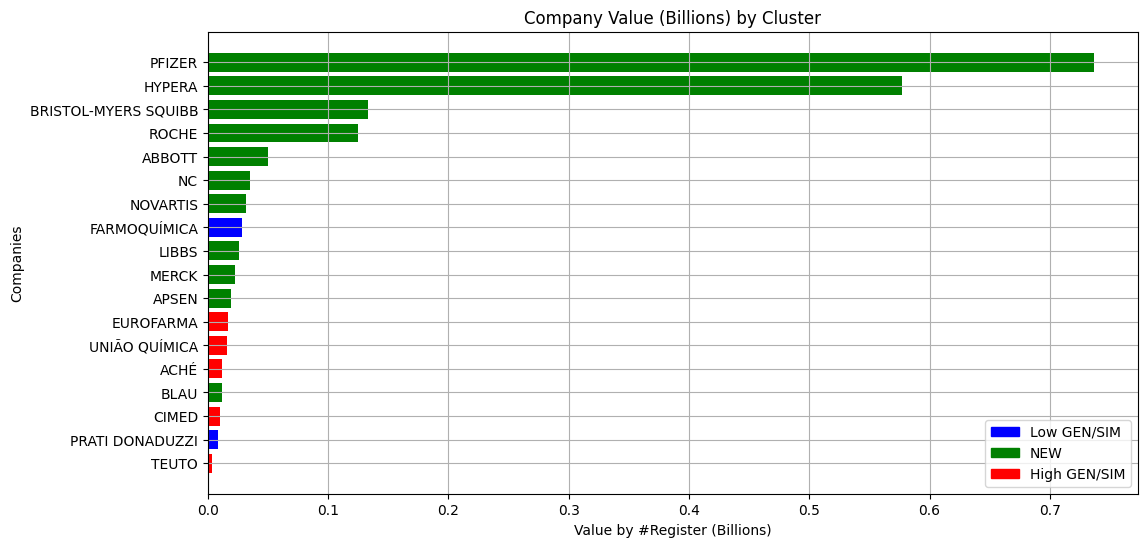

In [186]:
# Adding Value by register
df_billion_comp['Value by #Registers'] = df_billion_comp['Value (Billions)'] / df_billion_comp['#Registers']

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))

df_billion_comp_sorted = df_billion_comp.sort_values('Value by #Registers', ascending=True)

color_map = {
    0: ('blue', 'Low GEN/SIM'),
    1: ('green', 'NEW'),
    2: ('red', 'High GEN/SIM')
}

plt.barh(df_billion_comp_sorted.index, df_billion_comp_sorted['Value by #Registers'],
                color=df_billion_comp_sorted['Cluster'].map(lambda x: color_map[x][0]))

plt.xlabel('Value by #Register (Billions)')
plt.ylabel('Companies')
plt.title('Company Value (Billions) by Cluster')
plt.grid(True)

legend_patches = [mpatches.Patch(color=color, label=label) for cluster, (color, label) in color_map.items()]
plt.legend(handles=legend_patches, loc='best')

plt.show()

In [187]:
# Top 20 Sales in 2022

df_top_20_sales['Cluster'] = 0

for company in df_top_20_sales.index:
    mask = df_aggregated['REGISTRATION_HOLDER_COMPANY'].str.contains(company)
    indices = df_aggregated[mask].index

    if len(indices) > 0:
        value = df_aggregated.loc[indices, 'cluster'].iloc[0] # Use .iloc[0] to get the first element if multiple matches are found
        df_top_20_sales.loc[company, 'Cluster'] = value

df_top_20_sales

,Unit Sales (millions),#Registers,Cluster
Company,,,
NEO QUÍMICA,463.6,276,1
CIMED,389.6,191,2
EMS,356.2,668,0
EUROFARMA,238.2,468,2
ACHÉ,216.0,413,2
TEUTO,214.3,358,2
UNIÃO QUÍMICA,186.1,243,2
MEDLEY,174.7,321,2
SANOFI,157.0,324,1


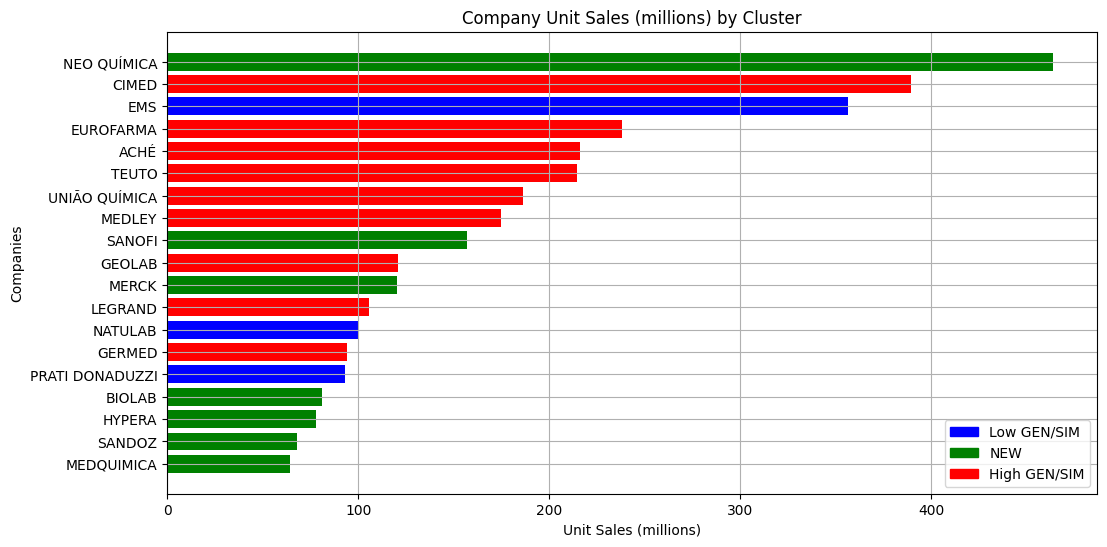

In [188]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(figsize=(12, 6))

df_top_20_sales_sorted = df_top_20_sales.sort_values('Unit Sales (millions)', ascending=True)

color_map = {
    0: ('blue', 'Low GEN/SIM'),
    1: ('green', 'NEW'),
    2: ('red', 'High GEN/SIM')
}

plt.barh(df_top_20_sales_sorted.index, df_top_20_sales_sorted['Unit Sales (millions)'],
                color=df_top_20_sales_sorted['Cluster'].map(lambda x: color_map[x][0]))

plt.xlabel('Unit Sales (millions)')
plt.ylabel('Companies')
plt.title('Company Unit Sales (millions) by Cluster')
plt.grid(True)

legend_patches = [mpatches.Patch(color=color, label=label) for cluster, (color, label) in color_map.items()]
plt.legend(handles=legend_patches, loc='best')

plt.show()